<p>Importing Library</p>

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<p>Loading File</p>

In [4]:
# Identify the file directory where CSV files are located
file_directory = 'C:/Users/Acer/Downloads/CW_question/Sales_Analysis/'

# Compile a list of every CSV file existing in the directory.
csv_files = [file for file in os.listdir(file_directory) if file.endswith('.csv')]

# Initialising an empty dataframe to store the merged data
merged_df_append = pd.DataFrame()

# Loop through each CSV file, read it into a dataframe, and concatenate it to the merged_df_append
for file in csv_files:
    file_path = os.path.join(file_directory, file)
    df = pd.read_csv(file_path)
    merged_df_append  = pd.concat([merged_df_append , df])

# Reset the index of the merged_df_append
merged_df_append .reset_index(drop=True, inplace=True)

NameError: name 'os' is not defined

<p>Checking Missing Values in the Dataset</p>

In [3]:
#checking for missing or null values 
merged_df_append.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [4]:
# count the number of missing values in each column 
merged_df_append.isna().sum() 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#drop any rows that contain missing values
merged_df_append=merged_df_append.dropna()
merged_df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
# count the number of missing values in each column 
merged_df_append.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
merged_df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<p>Write a python program to convert Quantity Ordered and Price Each
to numeric.</p>

In [8]:
# filter out rows from Quantity Ordered that contain non-numeric values
merged_df_append = merged_df_append[merged_df_append['Quantity Ordered'].str.isnumeric()]

# convert the Qunatity Ordered and Price eaach column to numeric
merged_df_append['Quantity Ordered']=pd.to_numeric(merged_df_append['Quantity Ordered'])
merged_df_append['Price Each']=pd.to_numeric(merged_df_append['Price Each'])

<p>Create a new column named Month from Ordered Date of updated
dataframe and convert it to integer as data type.</p>

In [1]:
#creates a new column called 'Month' which contains the month extracted from the 'Order Date' column
merged_df_append['Month']=pd.to_datetime(merged_df_append['Order Date']).dt.month

NameError: name 'pd' is not defined

In [2]:
#retrieves an array of unique values from the 'Month' column
merged_df_append['Month'].unique()

NameError: name 'merged_df_append' is not defined

In [11]:
#display the first few rows of merged_df_append dataframe
merged_df_append.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


<p>Create a new column named City from Purchase Address based on
the value in updated dataframe.</p>

In [12]:
#function returns the city from a given address string by splitting the string by comma and 
#returning the second element
def get_city(address):
    return address.split(",")[1]

In [13]:
#adds a new column 'City' to the dataframe 'merged_df_append' by applying the 'get_city' function 
#to the 'Purchase Address' column and displays information about the dataframe.
merged_df_append['City']=merged_df_append['Purchase Address'].apply(lambda x: get_city(x))
merged_df_append.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   City              185950 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.8+ MB


<p>Write a Python program to show summary statistics of sum, mean,
standard deviation, skewness, and kurtosis of any chosen variable.</p>

In [14]:
#generates a descriptive statistical summary of the 'Quantity Ordered' column
merged_df_append['Quantity Ordered'].describe()

count    185950.000000
mean          1.124383
std           0.442793
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64

In [30]:
#calculates the kurtosis of the 'Quantity Ordered' column
merged_df_append['Quantity Ordered'].kurt()

31.82048892027536

In [31]:
#calculates the skewness of the 'Quantity Ordered' column
merged_df_append['Quantity Ordered'].skew()

4.833164172577953

<p>Write a Python program to calculate and show correlation of all
variables.</p>

In [32]:
#calculating the correlation matrix for a merged dataframe
merged_df_append.corr()

,Quantity Ordered,Price Each,Month
Quantity Ordered,1.000000,-0.148272,0.000791
Price Each,-0.148272,1.000000,-0.003375
Month,0.000791,-0.003375,1.000000


<AxesSubplot:>

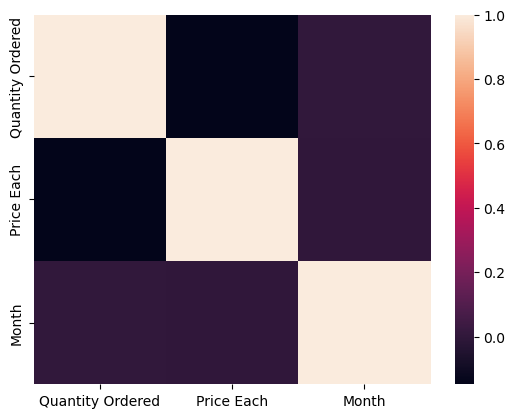

In [33]:
#Generates a heatmap visualization of the correlation matrix of the data
sns.heatmap(merged_df_append.corr())

<p>Which Month has the best sales? and how much was the earning in that
month? Make a bar graph of sales as well.</p>

In [34]:
#calculates the total sales by multiplying the quantity ordered with the price of each item 
#and assigns the result to a new column named 'Sales'
merged_df_append['Sales']=merged_df_append['Quantity Ordered'] * merged_df_append['Price Each']

In [36]:
#groups the 'merged_df_append' dataframe by month and then calculates the sum of 'Sales' for each group
merged_df_append.groupby(['Month']).sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

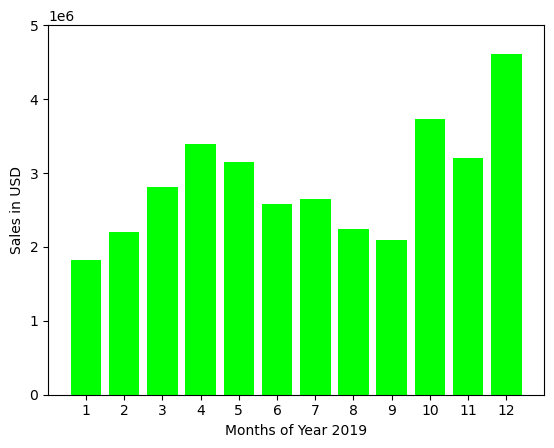

In [37]:
#creates a bar graph using Matplotlib to visualize the total sales in USD for each month 
months=range(1,13)
plt.bar(months,merged_df_append.groupby(['Month']).sum()['Sales'], color = '#00FF00')
plt.xticks(months)
plt.ylim(0,5000000,1000)
plt.xlabel("Months of Year 2019")
plt.ylabel("Sales in USD")
plt.show()

<p>Which city has sold the highest product?</p>

In [107]:
#groups the 'Sales' column by 'City' and calculates the sum of sales for each city.
city_sales=merged_df_append.groupby(['City']).sum()['Sales']
city_sales

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [39]:
#creates a list of unique cities extracted from a pandas DataFrame column.
cities=[]
for city in merged_df_append['City'].unique():
    cities.append(city)


In [40]:
#sorts the elements in the list "cities" in ascending order, and then returns the sorted list
cities.sort()
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

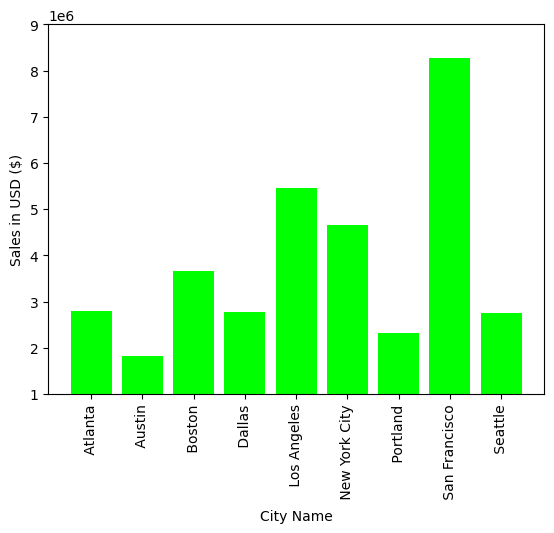

In [41]:
#creates a vertical bar graph showing the total sales for each city
plt.bar(cities,merged_df_append.groupby(['City']).sum()['Sales'], color = '#00FF00')
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.ylim(1000000,9000000,1000000)
plt.show()

<p>Which product was sold the most in overall? Illustrate it through bar
graph.</p>

In [42]:
#calculates the total quantity of each product sold based on a merged dataframe
Product_sales= merged_df_append.groupby(['Product']).sum()['Quantity Ordered']
Product_sales

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [43]:
#creates a list called "Product" containing unique values from the "Product" column
Product=[]
for each in merged_df_append['Product'].unique():
    Product.append(each)

In [44]:
#sorts the elements of the "Product" object in ascending order
Product.sort()

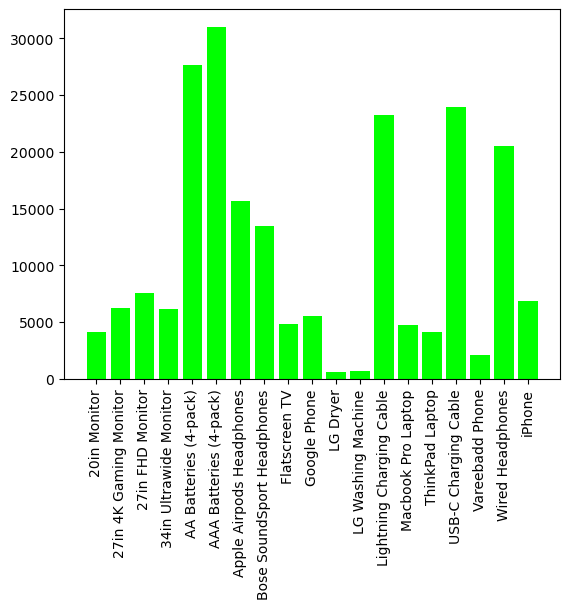

In [45]:
#generates a vertical bar graph to visualize the total quantity ordered for each product category
plt.bar(Product,merged_df_append.groupby(['Product']).sum()['Quantity Ordered'], color = '#00FF00')
plt.xticks(rotation='vertical')
plt.show()

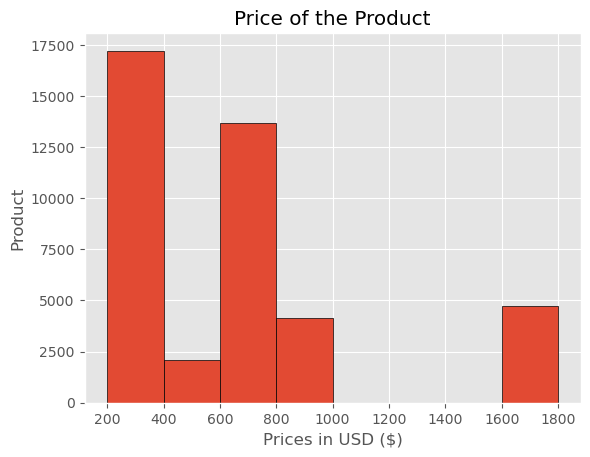

In [115]:
#uses the ggplot style to create a histogram of the "Price Each" column
plt.style.use('ggplot')
bins = [200,400,600,800,1000,1200,1400,1600,1800]
plt.hist(merged_df_append["Price Each"],color = '#00FF00', edgecolor = 'black', bins = bins)
plt.xlabel('Prices in USD ($)')
plt.ylabel('Product')
plt.title('Price of the Product')
plt.show()